In [1]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le = preprocessing.LabelEncoder()

Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features: ",features)

Features:  ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(features,
                        Play_encoded, test_size = 0.05, random_state =142)

In [6]:
clf.fit(data_train,target_train)
print(clf.score(data_train,target_train))
predicted = clf.predict(data_test)
print(predicted)


1.0
[1]


In [7]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(target_test, predicted))
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, predicted)

Accuracy: 1.0


array([[1]])

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(target_test, predicted, average='macro')
recall = recall_score(target_test, predicted, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


precision: 1.0
recall: 1.0


[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]\nclass = Class_1'),
 Text(74.4, 152.208, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Class_1'),
 Text(148.8, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = Class_0'),
 Text(74.4, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Class_0'),
 Text(37.2, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Class_0'),
 Text(111.60000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Class_0'),
 Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Class_1'),
 Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Class_0'),
 Text(223.20000000000002, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Class_1'),
 Text(186.0, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Class_1'),
 Text(260.40000000000003, 65.232, 'X[1]

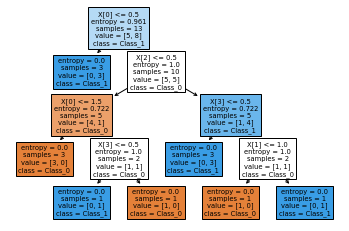

In [9]:
from sklearn import tree
tree.plot_tree(clf,filled=True,class_names=['Class_0','Class_1','Class_2'])

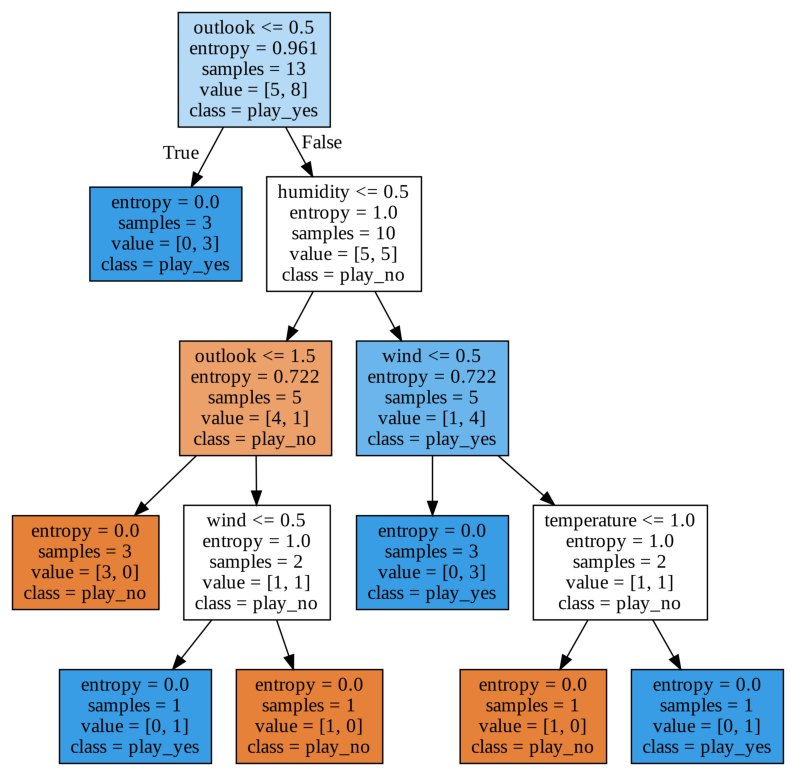

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
                feature_names=['outlook','temperature','humidity','wind'],
                class_names=['play_no','play_yes'], 
                filled=True)

from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [11]:
predicted= clf.predict([[1,2,1,0],[2,0,0,1]])
print("Predicted Value:", predicted)

Predicted Value: [1 0]
